In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ismember import ismember
import pylab
import seaborn as sns
from util import waveform_similarity_cal, waveform_overlay_plot,location_cal, unit_position_plot

%matplotlib inline

In [2]:
data_folder = './data/trdelectrodes/'
save_folder = './Figures/Fig4/'
if os.path.exists(save_folder)==False:
    os.mkdir(save_folder)

# Waveform over time

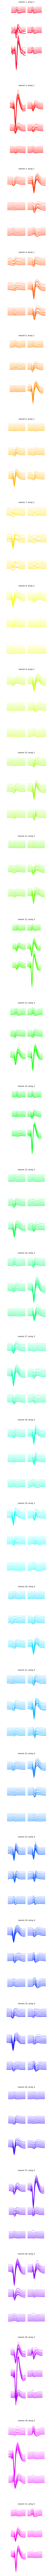

In [3]:
mouse_id = 'mouse3'
months = np.array(['Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6', 'Month7'])
stable_neuron_table = pd.read_csv(data_folder+f'{mouse_id}_stable_neuron_table_waveform.csv')
stable_neuron_ids = stable_neuron_table[months[0]].values[~np.isnan(np.sum(stable_neuron_table[months].values,axis=1))]
info = pd.read_pickle(data_folder+f'{mouse_id}_template_info')

stable_info = []
    
for month_name in months:
    info_month = info.loc[info['month_name']==month_name]
    indices,_ = ismember(info_month['neuron_id'].values, stable_neuron_ids)
    info_month_stable = info_month.iloc[indices]
    
    stable_info.append(info_month_stable)
    
waveform_overlay_plot(stable_info, stable_neuron_ids, ylim=[-500,200], y_scale_factor=0.5, 
              x_scale_factor=1.5, y_displace=5.8, alpha_lim=[0.3,1], save_path=save_folder+'/Fig4c.png')

# ISI violation

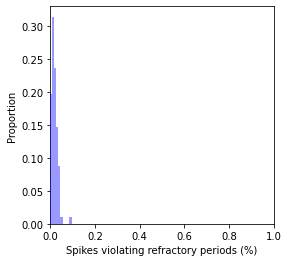

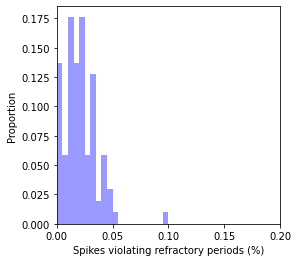

In [4]:
isi_violation_df = pd.read_csv(data_folder+'isi_violation_rate.csv')

isi_violation = isi_violation_df['isi_violation_rate'].values
fig, ax = plt.subplots(figsize=(4,4))
maxbin = 1
minbin = 0
binsize = 0.01
bin_counts_1, bin_edges = np.histogram(isi_violation, 
                                       bins=np.arange(minbin,maxbin+binsize,binsize), density=True)
line1 = ax.bar(bin_edges[:-1],bin_counts_1*binsize,width=binsize*1,color='b', 
               alpha=0.4, zorder=10)
ax.set_xlim([minbin, maxbin])
ax.set_xlabel('Spikes violating refractory periods (%)')
ax.set_ylabel('Proportion')
plt.savefig(save_folder+'/Fig4e.png')

fig, ax = plt.subplots(figsize=(4,4))
maxbin = 0.2
minbin = 0
binsize = 0.005
bin_counts_1, bin_edges = np.histogram(isi_violation, 
                                       bins=np.arange(minbin,maxbin+binsize,binsize), density=True)
line1 = ax.bar(bin_edges[:-1]+binsize/2,bin_counts_1*binsize,width=binsize*1,color='b', 
               alpha=0.4, zorder=10)
ax.set_xlim([minbin, maxbin])
ax.set_xlabel('Spikes violating refractory periods (%)')
ax.set_ylabel('Proportion')
plt.savefig(save_folder+'/Fig4e_zoomin.png')

# Waveform similarity

In [5]:
mouse_ids = np.array(['mouse1','mouse2','mouse3','mouse4','mouse5'])
stable_info = []
template_info = []
mouse_neuron_num = 0
mouse_shank_num = 0
mouse_neuron_num_template = 0
mouse_shank_num_template = 0

for mouse_id in mouse_ids:
    mouse_stable_info = pd.read_pickle(data_folder+f'{mouse_id}_stable_info_waveform')
    mouse_stable_info['mouse_id'] = mouse_id
    mouse_stable_info['mouse_neuron_id'] = mouse_stable_info['neuron_id'] + mouse_neuron_num
    mouse_stable_info['mouse_array_id'] = mouse_stable_info['array_id'] + mouse_shank_num
    mouse_neuron_num += len(np.unique(mouse_stable_info['neuron_id'].values))
    mouse_shank_num += len(np.unique(mouse_stable_info['array_id'].values))
    stable_info.append(mouse_stable_info)
    
    mouse_template_info = pd.read_pickle(data_folder+f'{mouse_id}_template_info')
    neuron_ids = mouse_template_info.loc[mouse_template_info['month_id']==0]['neuron_id'].unique()
    indices, _ = ismember(mouse_template_info['neuron_id'].values, neuron_ids)
    mouse_template_info = mouse_template_info.iloc[indices]
    
    mouse_template_info['mouse_id'] = mouse_id
    mouse_template_info['mouse_neuron_id'] = mouse_template_info['neuron_id'] + mouse_neuron_num_template
    mouse_template_info['mouse_array_id'] = mouse_template_info['array_id'] + mouse_shank_num_template
    mouse_neuron_num_template += len(np.unique(mouse_template_info['neuron_id'].values))
    mouse_shank_num_template += len(np.unique(mouse_template_info['array_id'].values))
    template_info.append(mouse_template_info)

stable_info = pd.concat(stable_info)
template_info = pd.concat(template_info)

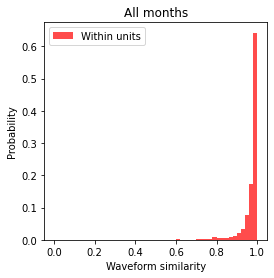

In [6]:
mouse_ids = np.array(['mouse1','mouse2','mouse3','mouse4','mouse5'])
template_info = []
mouse_neuron_num_template = 0
mouse_shank_num_template = 0

for mouse_id in mouse_ids:
    
    mouse_template_info = pd.read_pickle(data_folder+f'{mouse_id}_stable_info_waveform')
    neuron_ids = mouse_template_info.loc[mouse_template_info['month_id']==0]['neuron_id'].unique()
    indices, _ = ismember(mouse_template_info['neuron_id'].values, neuron_ids)
    mouse_template_info = mouse_template_info.iloc[indices]
    
    mouse_template_info['mouse_id'] = mouse_id
    mouse_template_info['mouse_neuron_id'] = mouse_template_info['neuron_id'] + mouse_neuron_num_template
    mouse_template_info['mouse_array_id'] = mouse_template_info['array_id'] + mouse_shank_num_template
    mouse_neuron_num_template += len(np.unique(mouse_template_info['neuron_id'].values))
    mouse_shank_num_template += len(np.unique(mouse_template_info['array_id'].values))
    template_info.append(mouse_template_info)

template_info = pd.concat(template_info)

r_values_within_all = []
neuron_ids = template_info.loc[template_info['month_id']==0]['neuron_id'].unique()
for day0_id in range(6):
    info_day0 = template_info.loc[template_info['month_id']==day0_id]
    template_day0 = info_day0['template'].values
    
    for day1_id in range(day0_id+1,7):
        info_day1 = template_info.loc[template_info['month_id']==day1_id]
        template_day1 = info_day1['template'].values
        
        within_choosen = [(i,i) for i in range(len(template_day0))]
        r_values_within, _ = waveform_similarity_cal(within_choosen, template_day0, template_day1)
        r_values_within_all.append(r_values_within)
        
        within_mean = np.mean(r_values_within)
        within_std = np.std(r_values_within)
        within_med = np.median(r_values_within)
        

r_values_within_all = np.hstack(r_values_within_all)

fig, ax = plt.subplots(figsize=(4,4))
maxbin = 1
minbin = 0
binsize = 0.02
bin_counts_day_within, bin_edges = np.histogram(r_values_within_all, bins=np.arange(minbin,maxbin+binsize,binsize), 
                                          density=True)

line1 = ax.bar(bin_edges[:-1]+binsize/2,bin_counts_day_within*binsize,width=binsize,color='red', alpha=0.7)
ax.legend([line1,],['Within units'])
ax.set_title('All months')
ax.set_xlabel('Waveform similarity')
ax.set_ylabel('Probability')
plt.savefig(save_folder+f'waveform_similarity_distr_all_days_within.pdf')


within_mean = np.mean(r_values_within_all)
within_std = np.std(r_values_within_all)
within_med = np.median(r_values_within_all)

plt.savefig(save_folder+'/Fig4f.png')

# Stable percentage

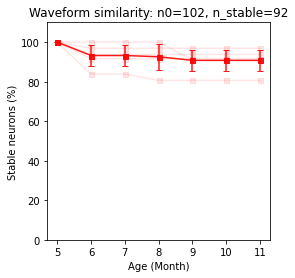

In [7]:
total_counts = []
stable_counts = []
for mouse_id in mouse_ids:
    count_df = pd.read_csv(data_folder+f'{mouse_id}_neuron_count_waveform.csv')
    total_counts.append(count_df['total count'].values)
    stable_counts.append(count_df['stable count'].values)

total_counts = np.vstack(total_counts)
stable_counts = np.vstack(stable_counts)

concat_total_counts = np.sum(total_counts, axis=0)
concat_stable_counts = np.sum(stable_counts, axis=0)

stable_percent = stable_counts / np.expand_dims(stable_counts[:,0],axis=1) * 100

concat_stable_percent = np.mean(stable_percent,axis=0)
concat_stable_percent_std = np.std(stable_percent,axis=0)

# figure
fig, ax = plt.subplots(figsize=(4,4))
for idx in range(len(mouse_ids)):
    ax.plot(stable_percent[idx,:], c='r', marker='s', alpha=0.1, markersize=5)

ax.errorbar(range(7), concat_stable_percent, yerr=concat_stable_percent_std, 
                    c='r', marker='s', alpha=0.9, capsize=3, markersize=5)
ax.set_ylim([0,110])
ax.set_ylabel('Stable neurons (%)')
ax.set_xticks(np.arange(7), np.arange(7)+5)
ax.set_xlabel('Age (Month)')
ax.set_title(f'Waveform similarity: n0={concat_stable_counts[0]}, n_stable={concat_stable_counts[-1]}')

plt.savefig(save_folder+f'Fig4g.png')

# Location over time

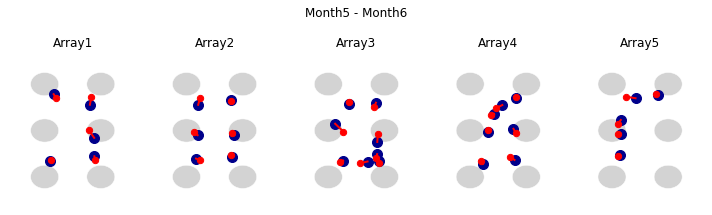

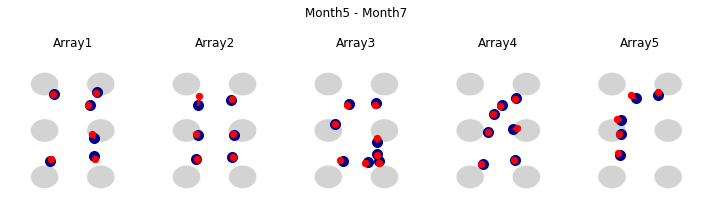

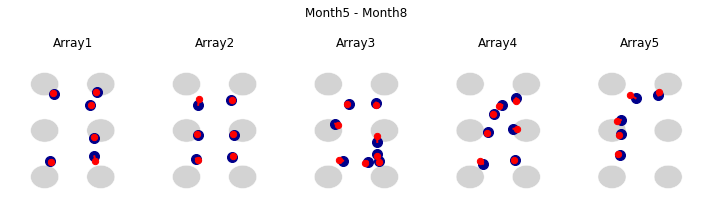

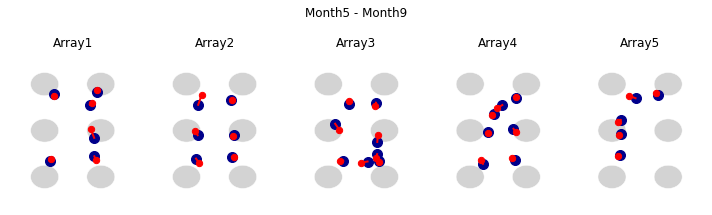

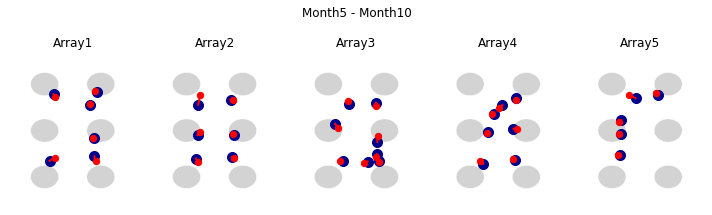

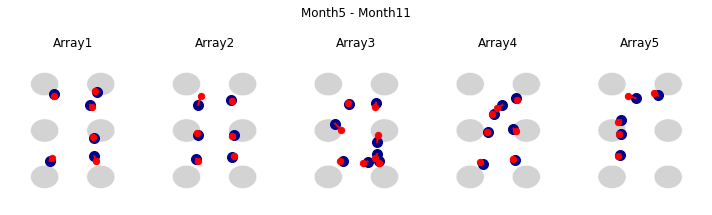

In [8]:
mouse_id = 'mouse3'
months = np.array(['Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6', 'Month7'])
template_info = pd.read_pickle(data_folder+f'{mouse_id}_template_info')

for month0_id in [0]:
    month0_name = f'Month{month0_id+5}'
    info_month0 = template_info.loc[template_info['month_id']==month0_id]
    neuron_ids_month0 = info_month0['neuron_id'].values
    template_month0 = info_month0['template'].values
    array_ids_month0 = info_month0['array_id'].values
    locations_month0 = location_cal(info_month0)
    
    for month_follow_id in np.arange(month0_id+1,len(months)):
        month_follow_name = f'Month{month_follow_id+5}'
        info_month_follow = template_info.loc[template_info['month_id']==month_follow_id]
        neuron_ids_month_follow = info_month_follow['neuron_id'].values
        template_month_follow = info_month_follow['template'].values
        array_ids_month_follow = info_month_follow['array_id'].values
        locations_month_follow = location_cal(info_month_follow)
        
        stable_neuron_ids = np.intersect1d(neuron_ids_month0, neuron_ids_month_follow)
        
        indices_month0,_ = ismember(neuron_ids_month0, stable_neuron_ids)
        indices_month_follow,_ = ismember(neuron_ids_month_follow, stable_neuron_ids)
        locations_month0_stable = locations_month0[indices_month0,:]
        locations_month_follow_stable = locations_month_follow[indices_month_follow,:]
        array_ids_stable = array_ids_month0[indices_month0]
        
        unit_position_plot(locations_month0_stable, locations_month_follow_stable, 
                           array_ids_stable, month0_name, month_follow_name, with_device_index=False, 
                           colors=['darkblue','red'], s=[400,160], linewidth=2, 
                           save_path=save_folder+f'/Fig4h_{month0_name}_{month_follow_name}.png')


# Position drift over time

In [9]:
drift_df = []
for mouse_id in mouse_ids:
    drift_df_mouse = pd.read_csv(data_folder+f'/{mouse_id}_geometry_drift.csv')
    drift_df.append(drift_df_mouse)
    
drift_df = pd.concat(drift_df)

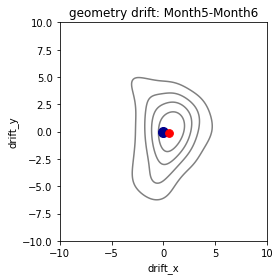

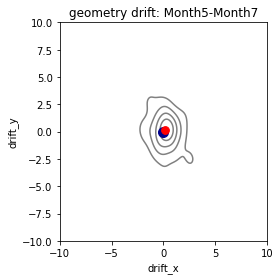

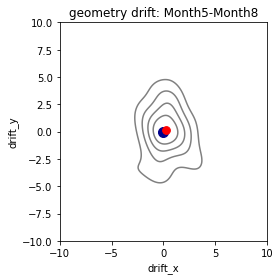

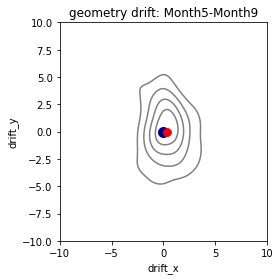

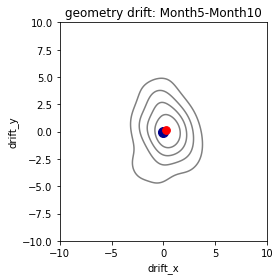

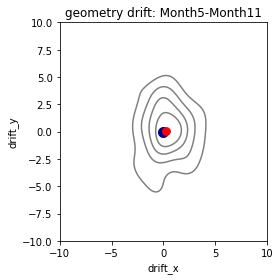

In [10]:
colors=['darkblue','red']
s=[100,60]
lim=[-10,10]
levels=5
thresh=0.2

for month0_id in [0]:
    for month1_id in range(month0_id+1, len(months)):
        location = drift_df[[f'{month0_id+1}-{month1_id+1}_x', f'{month0_id+1}-{month1_id+1}_y']].values
        nan_index = np.isnan(np.sum(drift_df[[f'{1}-{month1_id_id+1}_x' 
                                              for month1_id_id in range(1, month1_id+1)]].values,axis=1))

        location = location[~nan_index,:]
        location = pd.DataFrame({'drift_x': location[:,0], 'drift_y': location[:,1]})

        dift_vec =[[0,location[f'drift_x'].mean()],
              [0,location[f'drift_y'].mean()]]
        
        fig, ax = plt.subplots(figsize=(4,4))
        sns.kdeplot(data=location, x=f'drift_x', y=f'drift_y', levels=levels, ax=ax,
                thresh=thresh, color='gray',zorder=-1)
        ax.plot(dift_vec[0],dift_vec[1],color=colors[1],zorder=1,linewidth=2)
        ax.scatter([0],[0],color=colors[0],zorder=2,s=s[0])
        ax.scatter([location[f'drift_x'].mean()],[location[f'drift_y'].mean()],color=colors[1],zorder=3,s=s[1])
        ax.set_xlim(lim)
        ax.set_ylim(lim)
        ax.set_title(f'geometry drift: Month{month0_id+5}-Month{month1_id+5}')
        plt.tight_layout()
        plt.savefig(save_folder+f'Fig4i_Month{month0_id+5}-Month{month1_id+5}.png')

# Position CDF

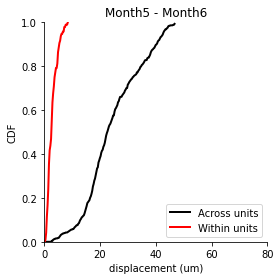

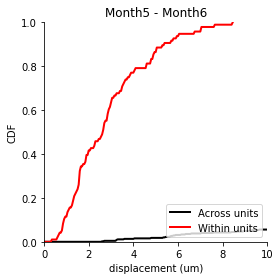

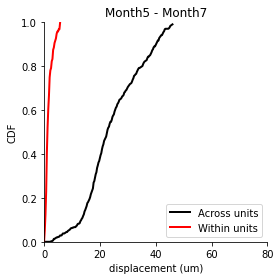

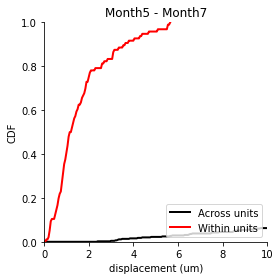

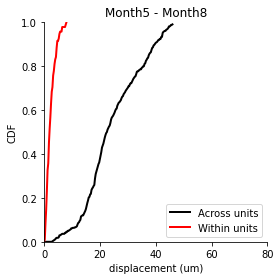

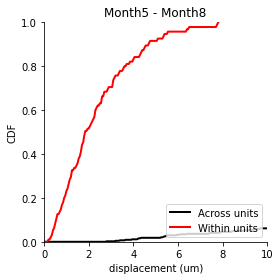

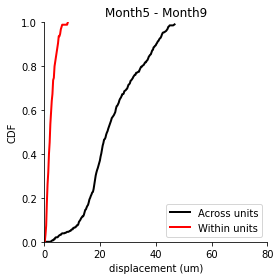

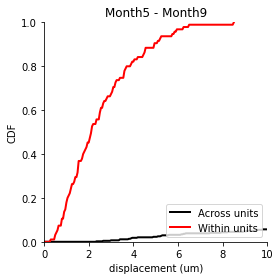

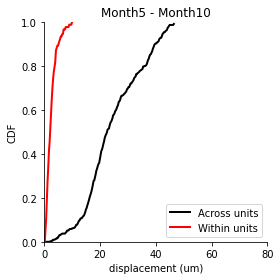

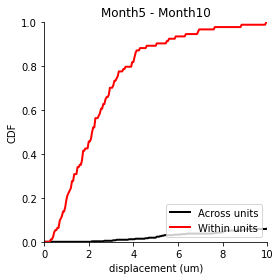

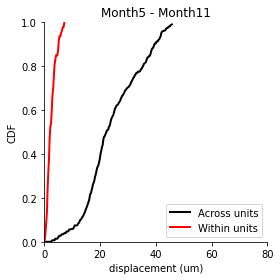

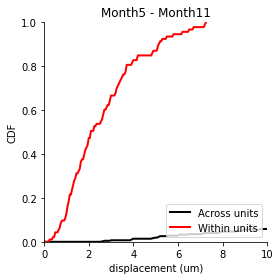

In [11]:
# 0807
linewidth=2
maxbin1=80
maxbin2=10
binsize1=0.25
binsize2=0.05
shank_start_position = [[0,0],[]]

stable_neuron_displacement_all_mice_all_month = []
cross_neuron_displacement_all_mice_all_month = []
    
for month0_id in [0]:
    for month_follow_id in range(month0_id+1,7):
        stable_neuron_displacement_all_mice = []
        cross_neuron_displacement_all_mice = []
        drift_df = []
        for mouse_id in mouse_ids:
            template_info = pd.read_pickle(data_folder+f'{mouse_id}_template_info')
            info_month0 = template_info.loc[template_info['month_id']==month0_id]
            neuron_ids_month0 = info_month0['neuron_id'].values
            template_month0 = info_month0['template'].values
            array_ids_month0 = info_month0['array_id'].values
            locations_month0 = location_cal(info_month0)
            
            info_month_follow = template_info.loc[template_info['month_id']==month_follow_id]
            neuron_ids_month_follow = info_month_follow['neuron_id'].values
            template_month_follow = info_month_follow['template'].values
            array_ids_month_follow = info_month_follow['array_id'].values
            locations_month_follow = location_cal(info_month_follow)
            
            stable_neuron_table = pd.read_csv(data_folder+f'{mouse_id}_stable_neuron_table_location.csv')
            nan_indices = np.isnan(np.sum(stable_neuron_table[months[:month_follow_id+1]].values,axis=1))
            stable_neuron_ids = stable_neuron_table['Month1'].values[~nan_indices]
            
            common_neuron_ids = np.intersect1d(np.intersect1d(stable_neuron_ids, neuron_ids_month0), 
                                               neuron_ids_month_follow)
            
            month0_indices,_ = ismember(neuron_ids_month0, common_neuron_ids)
            month_follow_indices,_ = ismember(neuron_ids_month_follow, common_neuron_ids)
            
            locations_month0_stable = locations_month0[month0_indices,:]
            locations_month_follow_stable = locations_month_follow[month_follow_indices,:]
            
            array_ids = array_ids_month0[month0_indices]
            
            stable_neuron_pairs = np.array([[i,i] for i in range(len(locations_month0_stable))])
            
            cross_neuron_pairs = []
            for array_id in np.unique(array_ids):
                neuron_ids_array = np.arange(len(array_ids))[array_ids==array_id]
                for neuron_id_0 in neuron_ids_array:
                    for neuron_id_1 in neuron_ids_array:
                        if(neuron_id_0!=neuron_id_1):
                            cross_neuron_pairs.append([neuron_id_0, neuron_id_1])
            cross_neuron_pairs = np.vstack(cross_neuron_pairs)              

            locations_month0_cross = locations_month0_stable[cross_neuron_pairs[:,0],:]
            locations_month_follow_cross = locations_month_follow_stable[cross_neuron_pairs[:,1],:]
            
            stable_neuron_displacement = np.sqrt(np.sum(np.square(locations_month0_stable - 
                                                          locations_month_follow_stable),axis=1))
            cross_neuron_displacement = np.sqrt(np.sum(np.square(locations_month0_cross - 
                                                          locations_month_follow_cross),axis=1))
            stable_neuron_displacement_all_mice.append(stable_neuron_displacement)
            cross_neuron_displacement_all_mice.append(cross_neuron_displacement)
        stable_neuron_displacement_all_mice = np.hstack(stable_neuron_displacement_all_mice)
        cross_neuron_displacement_all_mice = np.hstack(cross_neuron_displacement_all_mice)
            
        fig,ax = plt.subplots(figsize=(4,4))
        minbin = 0
        maxbin = maxbin1
        binsize = binsize1
        count, bins_count = np.histogram(cross_neuron_displacement_all_mice, bins=np.arange(minbin,maxbin,binsize))
        pdf = count / (sum(count) + 1e-6)
        cdf = np.cumsum(pdf)
        plot_indices = min(np.where(cdf<0.99)[0][-1]+1, len(cdf))
        ax.plot(np.hstack(([0],bins_count[1:][:plot_indices+1])), 
                np.hstack(([0],cdf[:plot_indices+1])), c='k', linewidth=linewidth, 
                label="Across units")

        count, bins_count = np.histogram(stable_neuron_displacement_all_mice, bins=np.arange(minbin,maxbin,binsize))
        pdf = count / (sum(count) + 1e-6)
        cdf = np.cumsum(pdf)
        plot_indices = min(np.where(cdf<0.99)[0][-1]+1, len(cdf))
        ax.plot(np.hstack(([0],bins_count[1:][:plot_indices+1])), 
                np.hstack(([0],cdf[:plot_indices+1])), c='r', linewidth=linewidth, 
                label="Within units")

        ax.legend(loc='lower right')
        ax.set_xlim(minbin, maxbin)
        ax.set_ylim(0,1)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel("displacement (um)")
        ax.set_ylabel('CDF')
        ax.set_title(f'Month{month0_id+5} - Month{month_follow_id+5}')
        plt.tight_layout()
        plt.savefig(save_folder+f'Fig4j_month{month0_id+5}_month{month_follow_id+5}.png')

        # zoom in
        fig,ax = plt.subplots(figsize=(4,4))
        minbin = 0
        maxbin = maxbin1
        binsize = binsize2
        count, bins_count = np.histogram(cross_neuron_displacement_all_mice, bins=np.arange(minbin,maxbin,binsize))
        pdf = count / (sum(count) + 1e-6)
        cdf = np.cumsum(pdf)
        plot_indices = min(np.where(cdf<0.99)[0][-1]+1, len(cdf))
        ax.plot(np.hstack(([0],bins_count[1:][:plot_indices+1])), 
                np.hstack(([0],cdf[:plot_indices+1])), c='k', linewidth=linewidth, 
                label="Across units")

        count, bins_count = np.histogram(stable_neuron_displacement_all_mice, bins=np.arange(minbin,maxbin,binsize))
        pdf = count / (sum(count) + 1e-6)
        cdf = np.cumsum(pdf)
        plot_indices = min(np.where(cdf<0.99)[0][-1]+1, len(cdf))
        ax.plot(np.hstack(([0],bins_count[1:][:plot_indices+1])), 
                np.hstack(([0],cdf[:plot_indices+1])), c='r', linewidth=linewidth, 
                label="Within units")

        ax.legend(loc='lower right')
        ax.set_xlim(0, maxbin2)
        ax.set_ylim(0,1)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel("displacement (um)")
        ax.set_ylabel('CDF')
        ax.set_title(f'Month{month0_id+5} - Month{month_follow_id+5}')
        plt.tight_layout()
        plt.savefig(save_folder+f'Fig4j_zoomin_month{month0_id+5}_month{month_follow_id+5}.png')
        

# Drift

In [12]:
drift_df = []
for mouse_id in mouse_ids:
    drift_df_mouse = pd.read_csv(data_folder+f'/{mouse_id}_geometry_drift.csv')
    drift_df.append(drift_df_mouse)
    
drift_df = pd.concat(drift_df)

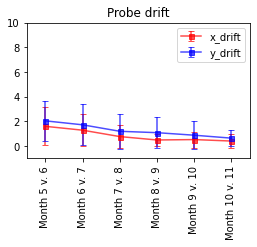

In [13]:
day_pairs = [[i,i+1] for i in range(6)]
month_paris = [f'Month {i+5} v. {i+6}' for i in range(6)]

drift_x = []
drift_y = []
for day_pair in day_pairs:
    month0_id = day_pair[0]
    month1_id = day_pair[1]
    location = drift_df[[f'{month0_id+1}-{month1_id+1}_x', f'{month0_id+1}-{month1_id+1}_y']].values
    nan_index = np.isnan(np.sum(drift_df[[f'{1}-{month1_id_id+1}_x' 
                                              for month1_id_id in range(1, month1_id+1)]].values,axis=1))

    location = location[~nan_index,:]
    drift_x.append(location[:,0])
    drift_y.append(location[:,1])
    
        
fig, ax = plt.subplots(figsize=(4,2.5))

drift_x_mean = [np.mean(np.abs(drift_x[i])) for i in range(len(drift_x))]
drift_x_std = [np.std(np.abs(drift_x[i])) for i in range(len(drift_x))]
drift_y_mean = [np.mean(np.abs(drift_y[i])) for i in range(len(drift_y))]
drift_y_std = [np.std(np.abs(drift_y[i])) for i in range(len(drift_y))]

line1 = ax.errorbar(np.arange(len(drift_x_mean)), drift_x_mean, yerr=drift_x_std, 
            marker='s', c='r', capsize=3, alpha=0.7, markersize=5)
line2 = ax.errorbar(np.arange(len(drift_x_mean)), drift_y_mean, yerr=drift_y_std, 
            marker='s', c='b', capsize=3, alpha=0.7, markersize=5)

ax.set_xlim([-0.5, len(drift_x_mean)-0.5])
ax.set_xticks(range(len(drift_x_mean)), month_paris, rotation=90)
ax.set_ylim([-1,10])
ax.legend([line1, line2],['x_drift', 'y_drift'])
ax.set_title('Probe drift')
plt.savefig(save_folder+'/Fig4k.png')

# Stable percentage

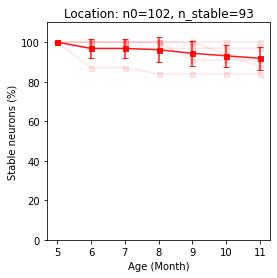

In [14]:
total_counts = []
stable_counts = []
for mouse_id in mouse_ids:
    count_df = pd.read_csv(data_folder+f'{mouse_id}_neuron_count_location.csv')
    total_counts.append(count_df['total count'].values)
    stable_counts.append(count_df['stable count'].values)

total_counts = np.vstack(total_counts)
stable_counts = np.vstack(stable_counts)

concat_total_counts = np.sum(total_counts, axis=0)
concat_stable_counts = np.sum(stable_counts, axis=0)

stable_percent = stable_counts / np.expand_dims(stable_counts[:,0],axis=1) * 100

concat_stable_percent = np.mean(stable_percent,axis=0)
concat_stable_percent_std = np.std(stable_percent,axis=0)

# figure
fig, ax = plt.subplots(figsize=(4,4))
for idx in range(len(mouse_ids)):
    ax.plot(stable_percent[idx,:], c='r', marker='s', alpha=0.1, markersize=5)

ax.errorbar(range(7), concat_stable_percent, yerr=concat_stable_percent_std, 
                    c='r', marker='s', alpha=0.9, capsize=3, markersize=5)
ax.set_ylim([0,110])
ax.set_ylabel('Stable neurons (%)')
ax.set_xticks(np.arange(7), np.arange(7)+5)
ax.set_xlabel('Age (Month)')
ax.set_title(f'Location: n0={concat_stable_counts[0]}, n_stable={concat_stable_counts[-1]}')

plt.savefig(save_folder+f'Fig4l.png')